<a href="https://colab.research.google.com/github/enzomolloy/Tp-Netlix/blob/main/TP1/TP_NEtflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga del archivo + filtro de dispositivos 

1) Ignorar los siguientes dispositivos: 'Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick'.


Explicación: Creamos una lista de todos los dispositivos que vamos a eliminar. Luego hacemos un bucle for que recorre todos los dispositivos de la lista y creamos un nuevo dataframe en donde solo van a estar los dispositvos que son distintos a los de la lista.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
from datetime import datetime


df = pd.read_csv('NetflixHistory.csv')

ForbiddenDevices = [
    'Sony PS4',
    'Netflix Windows App - Cadmium Windows Mobile',
    'Apple iPhone 6s',
    'Apple iPhone 7 Plus (CDMA)',
    'Chrome PC (Cadmium)',
    'Samsung 2015 NT14M DTV Smart TV',
    'iPhone 5S GSM',
    'Google Chromecast V3 Streaming Stick'
]

for i in ForbiddenDevices:
 df = df.loc[df["Device Type"] != i]

# EJ A

A) Contabilizar el dispositivo con el que más títulos se reprodujeron.


Explicación: Contamos cuantas veces aparece cada dispositivo con la función value_counts() y para ver solo el primer valor agregar .head(1). El dispositivo en cuestion es el Apple Apple TV 4 Apple TV   con un total de 3519. 

In [86]:
df["Device Type"].value_counts().head(1)

Apple Apple TV 4 Apple TV    3519
Name: Device Type, dtype: int64

# EJ B


B) Encontrar la película con más ocurrencias y la película con mayor duración total.


Explicación: Creamos un función para separar las peliculas de las series, esta funciona de forma tal que si el nombre contiene dos o mas ":", significa que es una serie, es decir que nos devuelve False, porque queremos solo las peliculas. En el otro caso que nos devuelva True porque son las peliculas que queremos. 
Luego creamos el Dataframe "TitleType" que serian todos los "Titles" con el filtro de la funcion aplicados con la funcion .apply()

In [87]:
def TitleType(input):
  if input.count(":") >=2:
    return False
  else: 
    return True 

df["TitleType"] = df["Title"].apply(TitleType)

Explicación: Creamos un nuevo Dataframe llamado occurencias, le aplicamos el filtro de peliculas y contamos cuantas veces aparece el mismo titulo. Luego hacemos lo mismo que en el caso de arriba para mostrar el resultado. La pelicula con mas occurencias es The Redeemed and the Dominant: Fittest on Earth con un total de 12 veces vista.

In [88]:
occurencias = df[df["TitleType"]]["Title"].value_counts()
occurencias.sort_values(ascending=False).head(1) 

El código enigma    7
Name: Title, dtype: int64

Explicación: Aca creamos un nuevo Dataframe llamado duracion, le aplicamos el filtro de peliculas a la agrupación del titulo con la Suma de duración de este titulo, para luego mostrar el resultado en una lista que va de mayor a menor "(ascending=False)" y le agregamos el head(1) para que solo nos muestre el resultado en la poscición 1. La pelicula con mas duración total es El club de la pelea con 02 h y 20m

In [89]:
duracion = df[df["TitleType"]].groupby("Title")["Duration"].sum() 
duracion.sort_values(ascending=False).head(1) 

Title
El club de la pelea    02:20:0502:20:11
Name: Duration, dtype: object

# EJ C
Generar un TOP “N” de series vistas y graficar.

C) Generar un TOP “N” de series vistas y graficar.

Parte 1: Por tiempo visto

Explicación: Primero usamos la misma función de arriba para determinar si es una pelicula o una serie, solo cambiamos el orden de True o False. Luego creamos otra funcion para separar el nombre de la serie de el capitulo y solo quedarnos con el nombre. Abajo de esta funcion convertimos durartion a datetime, para luego crear el df de horas, el cual consiste en sacarles la cantidad de horas a duration, sumarle la cantidad de minutos/60 (para que te de la cantidad en horas) y luego sumarle los segundos/3600 (tambien para que te lo de en horas). Podemos extraee segundos, minutos y horas con las herramientas .dt() de datetime. Finalmente solo nos queda crear un dataframe de timepo, como en el caso del punto B2, solo que en vez de Title usamos Titulo Simple, que es el nombre de la serie separado del episodio y juntarlo con horas en vez de la duracion. Para terminar la graficamos como en los casos anteriores. El top se determina con la cantidad de titulos que pones en .head()

Text(0, 0.5, 'Tiempo (Horas)')

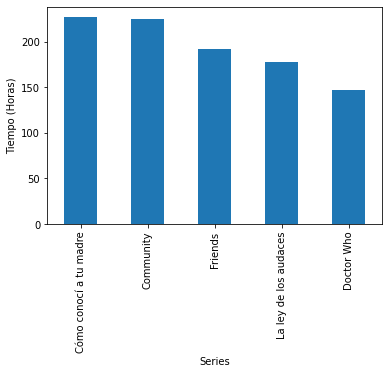

In [91]:
def TitleType(input):
  if input.count(":") >=2:
    return True
  else: 
    return False 

df["TitleType"] = df["Title"].apply(TitleType)

def tituloseparado(input):
  return input.split(':')[0]

df["Titulo Simple"] = df["Title"].apply(tituloseparado)

df["Duration"] = pd.to_datetime(df["Duration"], errors="raise") 
  
df["Horas"] = df["Duration"].dt.hour + df["Duration"].dt.minute/60 + df["Duration"].dt.second/3600 
  
tiempo = df[df["TitleType"]].groupby("Titulo Simple")["Horas"].sum() 
tiempo.sort_values(ascending=False).head(5).plot.bar(stacked=True)

plt.xlabel("Series", fontSize=10)
plt.ylabel("Tiempo (Horas)", fontSize=10)


C) Parte 2

Por ocurrencias


Explicación: Primero usamos la misma función de arriba para determinar si es una pelicula o una serie. Luego creamos otra funcion para separar el nombre de la serie del capitulo y solo quedarnos con el nombre. Esta parte era mas simples que la anterior ya que solo nos quedo contar la cantidad de veces que aperecio el Titulo Simple con value_counts() y graficarlo. El top se determina con la cantidad de titulos que pones en .head()

Text(0, 0.5, 'Occurencias')

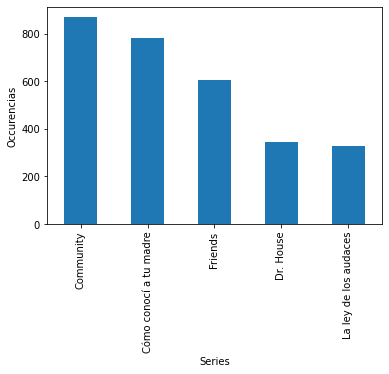

In [92]:
def TitleType(input):
  if input.count(":") >=2:
    return True
  else: 
    return False 

df["TitleType"] = df["Title"].apply(TitleType)

def tituloseparado(input):
  return input.split(':')[0]

df["Titulo Simple"] = df["Title"].apply(tituloseparado)

occurencias = df[df["TitleType"]]["Titulo Simple"].value_counts() 
occurencias.sort_values(ascending=False).head(5).plot.bar(stacked=True)

plt.xlabel("Series", fontSize=10)
plt.ylabel("Occurencias", fontSize=10)

# EJ D

Explicación: Al principio definimos una lista con todos los dias de la semana y otra con las horas del dia. Luego creamos un nuevo dataframe con las horas en el index y las dias en las columnas. Despues recorremos este dataframe e igualamos todos los valores a 0. Seguidamente, recorre la columna "Start Time" del dataframe original df y para cada valor, extrae el día de la semana y la hora, luego aumenta en 1 el número correspondiente en el dataframe df_new. Finalmente lo graficamos en forma de sns heatmap y lo modificamos para que se vea mejor. 

Aclaración 1: La función datetime.strptime() sirve para convertir un string a un objeto datetime. El primer argumento es el string a convertir y el segundo es el formato de ese string. Luego, el metodo .weekday() devuelve el numero del dia de la semana (0=lunes, 1=martes, ..., 6=domingo) del objeto datetime. Finalmente, el string que representa el dia de la semana se obtiene del array dias, que contiene los strings "lunes", "martes", etc.

Aclaración 2: En hora = (i.split()[1]).split(":")[0], lo que hace el código es tomar la cadena i que contiene una fecha y hora y extrae solo la hora. Luego, divide la hora en los componentes de hora, minuto y segundo y devuelve solo la hora.

Text(0.5, 46.5, 'Dias')

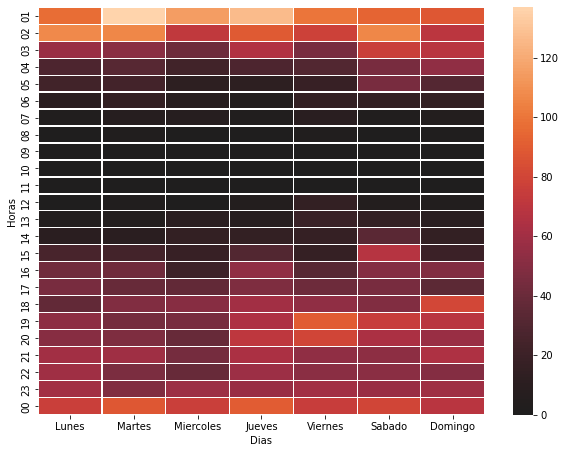

In [94]:
dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
horas = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "00"]

df_new = pd.DataFrame(index=horas, columns=dias)

for horas in df_new.columns:
    df_new[horas] = 0


for i in df["Start Time"]:
  diasemana = datetime.strptime(i.split()[0], "%Y-%m-%d").weekday()
  diasemana = dias[diasemana]
  hora = (i.split()[1]).split(":")[0]
  df_new[diasemana][hora] += 1

df_new = df_new.astype(np.float64)
fig = plt.figure(figsize = (10, 7.5))
fig = sns.heatmap(df_new, center=0, linewidths=.1)
plt.ylabel("Horas")
plt.xlabel("Dias")

# EJ E

E) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.


Explicación: Aca convertimos el dataframe "Start Time" en una serie de tipo datetime, la cual nos organiza las fechas y nos brinda una opción que nos servira mas adelante. Luego creamos el dataframe anio, el cual va a contener los años de nuestro datetime creado arriba, para obtener el año en especifico usamos dt.year, la cual es una función de datetime que nos perimite obtener solo el año de nuestra fecha. Luego contamos la cantidad de veces que aparece cada año y la mostramos en forma de grafico. Para ver las cantidades exactas solo sacamos el grafico.

Text(0, 0.5, 'Titulos vistos')

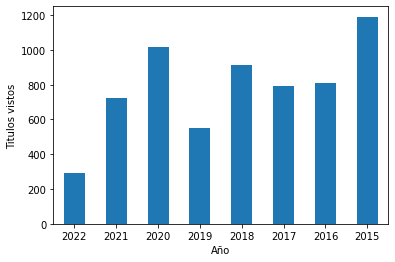

In [95]:
df["Start Time"] = pd.to_datetime(df["Start Time"], errors="raise")  

df["anio"] = df["Start Time"].dt.year

df["anio"].value_counts(sort=False).plot.bar(rot=0) 
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

plt.xlabel("Año", fontSize=10)
plt.ylabel("Titulos vistos", fontSize=10)

In [96]:
df["anio"].value_counts(sort=False)

2022     294
2021     722
2020    1016
2019     550
2018     916
2017     795
2016     807
2015    1191
Name: anio, dtype: int64

# EJ F

F) Total de días de todos los títulos reproducidos.

Explicación: Aca hicimos lo mismo que en el punto C1, solo que en lugar de convertir todo a hora, lo hicimos a segundos. Aclaración: Podemos extraee segundos, minutos y horas con las herramientas .dt() de datetime.
Despues sumamos todos los segundos con .sum() y lo dividimos por 86400 (la cant de segundos en un dia)

In [97]:
df["Duration"] = pd.to_datetime(df["Duration"], errors="raise") 
  
df["Seconds"] = df["Duration"].dt.hour*3600 + df["Duration"].dt.minute*60 + df["Duration"].dt.second 

(df["Seconds"]).sum() / 86400

99.78094907407407